<a href="https://colab.research.google.com/github/asthajha0211/Diabetes-Prediction/blob/main/Diabetes_Prediction_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

**Attribute Information:**

1. Number of times pregnant

2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test

3. Diastolic blood pressure (mm Hg)

4. Triceps skin fold thickness (mm)

5. 2-Hour serum insulin (mu U/ml)

6. Body mass index (weight in kg/(height in m)^2)

7. Diabetes pedigree function

8. Age (years)

9. Class variable (0 or 1)

In [ ]:
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode()
import plotly.io as pio
pio.renderers.default = 'iframe'

import warnings
warnings.filterwarnings('ignore')

# from model import get_model

In [ ]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [ ]:
# 2. Data Preparing

In [ ]:
# Loading Data
df = pd.read_csv('diabetes.csv')
# Getting dataframe columns names
df_name=df.columns

## 2.1. Analyze Data:
### 2.1.1 Descriptive Statitics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- The data is not included time or object
- There is no null value in data set

In [ ]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [ ]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

### 2.2. Data Visualization


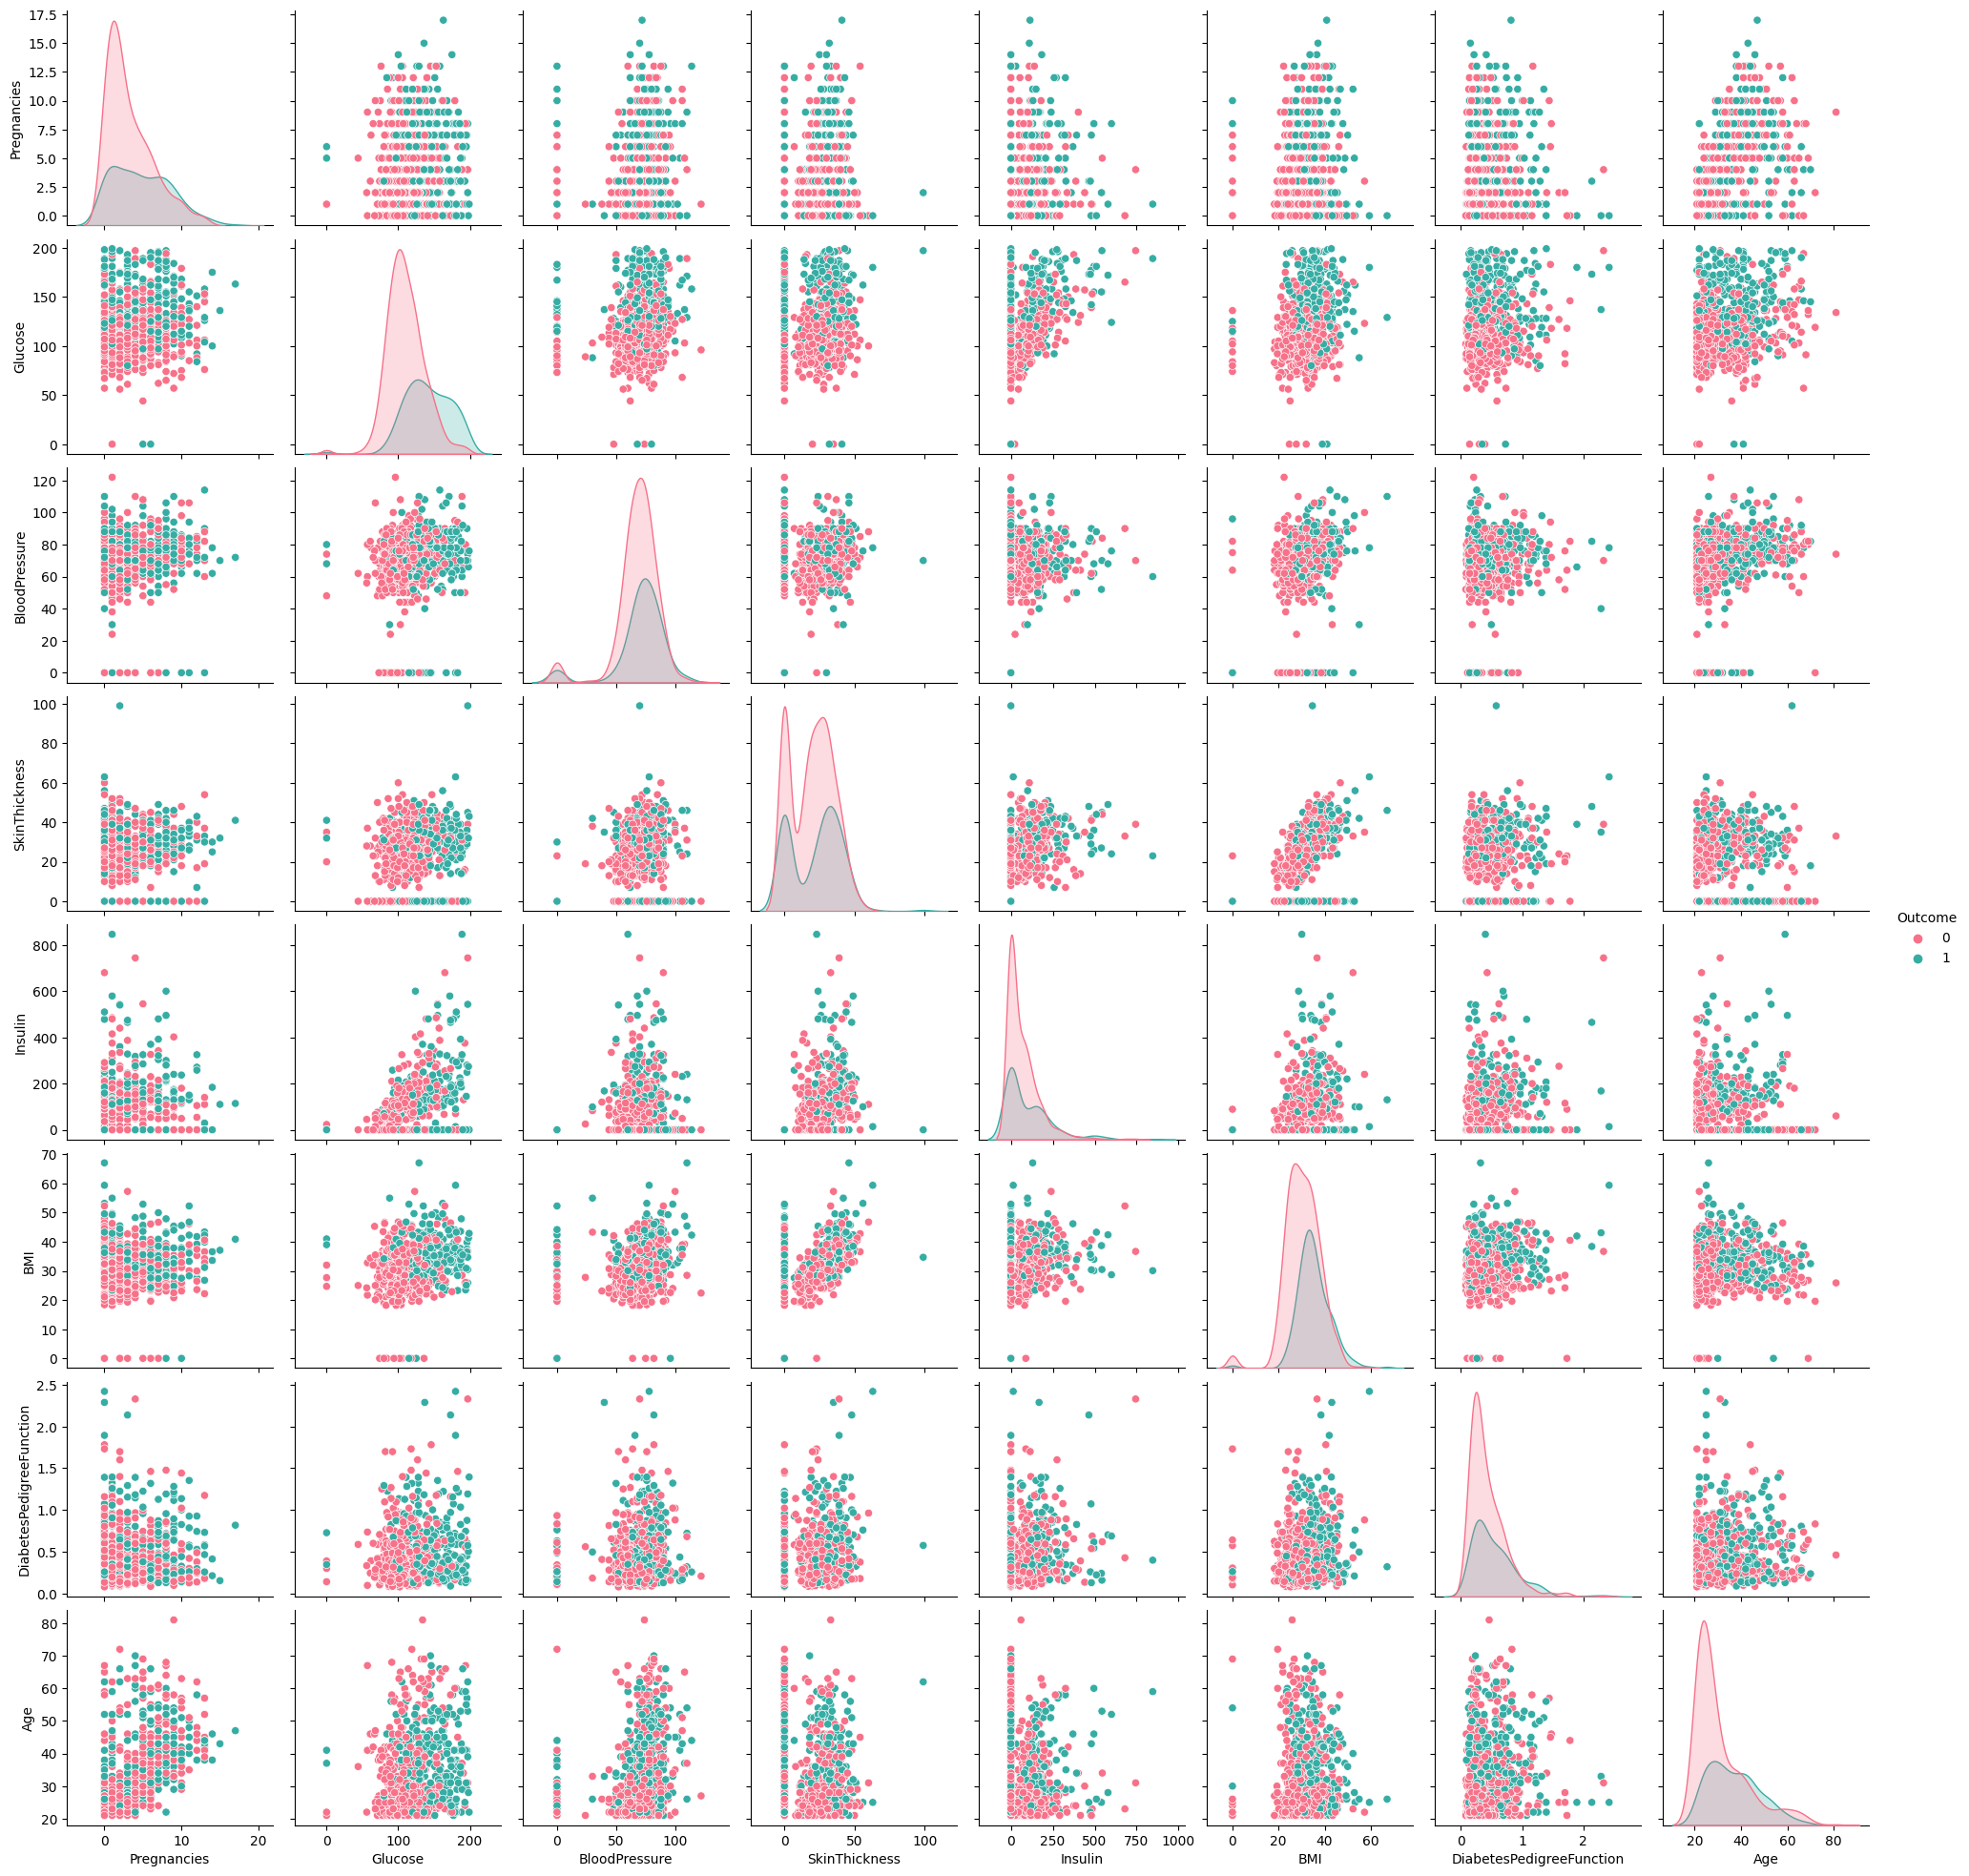

In [ ]:
 g = sns.pairplot(df, hue="Outcome", palette="husl")

It seems that the data suffer from outliers

Checking on pregnency distribution for the same.

In [ ]:
def plotHist(df,nameOfFeature):
    cls_train = df[nameOfFeature]
    data_array = cls_train
    hist_data = np.histogram(data_array)
    binsize = .5

    trace1 = go.Histogram(
        x=data_array,
        histnorm='count',
        name='Histogram of Wind Speed',
        autobinx=False,
        xbins=dict(
            start=df[nameOfFeature].min()-1,
            end=df[nameOfFeature].max()+1,
            size=binsize
        )
    )

    trace_data = [trace1]
    layout = go.Layout(
        bargroupgap=0.3,
         title='The distribution of ' + nameOfFeature,
        xaxis=dict(
            title=nameOfFeature,
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        ),
        yaxis=dict(
            title='Number of labels',
            titlefont=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
    fig = go.Figure(data=trace_data, layout=layout)
    py.iplot(fig)

**Skewness** is a measure of symmetry, or more precisely, the lack
of symmetry. A distribution, or data set, is symmetric if it
looks the same to the left and right of the center point.

**Kurtosis** is a measure of whether the data are heavy-tailed
or light-tailed relative to a normal distribution. That is,
data sets with high kurtosis tend to have heavy tails, or
outliers. Data sets with low kurtosis tend to have light
tails, or lack of outliers. A uniform distribution would
be the extreme case

In [ ]:
from scipy.stats import skew
from scipy.stats import kurtosis
def plotBarCat(df,feature,target):



    x0 = df[df[target]==0][feature]
    x1 = df[df[target]==1][feature]

    trace1 = go.Histogram(
        x=x0,
        opacity=0.75
    )
    trace2 = go.Histogram(
        x=x1,
        opacity=0.75
    )

    data = [trace1, trace2]
    layout = go.Layout(barmode='overlay',
                      title=feature,
                       yaxis=dict(title='Count'
        ))
    fig = go.Figure(data=data, layout=layout)
    fig.show(renderer="colab")

    # py.iplot(fig, filename='overlaid histogram')
    # fig.show(renderer="colab")

    def DescribeFloatSkewKurt(df,target):
        """
            A fundamental task in many statistical analyses is to characterize
            the location and variability of a data set. A further
            characterization of the data includes skewness and kurtosis.
            Skewness is a measure of symmetry, or more precisely, the lack
            of symmetry. A distribution, or data set, is symmetric if it
            looks the same to the left and right of the center point.
            Kurtosis is a measure of whether the data are heavy-tailed
            or light-tailed relative to a normal distribution. That is,
            data sets with high kurtosis tend to have heavy tails, or
            outliers. Data sets with low kurtosis tend to have light
            tails, or lack of outliers. A uniform distribution would
            be the extreme case
        """
        print('-*-'*25)
        print("{0} mean : ".format(target), np.mean(df[target]))
        print("{0} var  : ".format(target), np.var(df[target]))
        print("{0} skew : ".format(target), skew(df[target]))
        print("{0} kurt : ".format(target), kurtosis(df[target]))
        print('-*-'*25)

    DescribeFloatSkewKurt(df,target)

In [ ]:
plotBarCat(df,df_name[0],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[1],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[2],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[3],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[4],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[5],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[6],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[7],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


In [ ]:
plotBarCat(df,df_name[8],'Outcome')

-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Outcome mean :  0.3489583333333333
Outcome var  :  0.22718641493055558
Outcome skew :  0.6337757030614577
Outcome kurt :  -1.5983283582089547
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-


## 2.3.1 Outliers investigation

In [ ]:
def OutLiersBox(df,nameOfFeature):

    trace0 = go.Box(
        y = df[nameOfFeature],
        name = "All Points",
        jitter = 0.3,
        pointpos = -1.8,
        boxpoints = 'all',
        marker = dict(
            color = 'rgb(7,40,89)'),
        line = dict(
            color = 'rgb(7,40,89)')
    )

    trace1 = go.Box(
        y = df[nameOfFeature],
        name = "Only Whiskers",
        boxpoints = False,
        marker = dict(
            color = 'rgb(9,56,125)'),
        line = dict(
            color = 'rgb(9,56,125)')
    )

    trace2 = go.Box(
        y = df[nameOfFeature],
        name = "Suspected Outliers",
        boxpoints = 'suspectedoutliers',
        marker = dict(
            color = 'rgb(8,81,156)',
            outliercolor = 'rgba(219, 64, 82, 0.6)',
            line = dict(
                outliercolor = 'rgba(219, 64, 82, 0.6)',
                outlierwidth = 2)),
        line = dict(
            color = 'rgb(8,81,156)')
    )

    trace3 = go.Box(
        y = df[nameOfFeature],
        name = "Whiskers and Outliers",
        boxpoints = 'outliers',
        marker = dict(
            color = 'rgb(107,174,214)'),
        line = dict(
            color = 'rgb(107,174,214)')
    )

    data = [trace0,trace1,trace2,trace3]

    layout = go.Layout(
        title = "{} Outliers".format(nameOfFeature)
    )

    fig = go.Figure(data=data,layout=layout)
    fig.show(renderer="colab")
    # py.iplot(fig, filename = "Outliers")



In [ ]:
OutLiersBox(df,df_name[0])

In [ ]:
OutLiersBox(df,df_name[1])

In [ ]:
OutLiersBox(df,df_name[2])

In [ ]:
OutLiersBox(df,df_name[3])

In [ ]:
OutLiersBox(df,df_name[4])

In [ ]:
OutLiersBox(df,df_name[5])

In [ ]:
OutLiersBox(df,df_name[6])

In [ ]:
OutLiersBox(df,df_name[7])

In [ ]:
OutLiersBox(df,df_name[8])

## 2.3.2. Outliers investigation Pairs

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.font_manager

from sklearn import svm
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def OutLierDetection(df,feature1,feature2,outliers_fraction=.1):

    new_df = df.copy()
    rng = np.random.RandomState(42)

    # Example settings
    n_samples = new_df.shape[0]
#     outliers_fraction = 0.2 # ************************************** imp
    clusters_separation = [0]#, 1, 2]

    # define two outlier detection tools to be compared
    classifiers = {
        "One-Class SVM": svm.OneClassSVM(nu=0.95 * outliers_fraction + 0.05,
                                         kernel="rbf", gamma=0.1),
        "Robust covariance": EllipticEnvelope(contamination=outliers_fraction),
        "Isolation Forest": IsolationForest(max_samples=n_samples,
                                            contamination=outliers_fraction,
                                            random_state=rng),
        "Local Outlier Factor": LocalOutlierFactor(
            n_neighbors=35,
            contamination=outliers_fraction)}


    xx, yy = np.meshgrid(np.linspace(new_df[feature1].min()-new_df[feature1].min()*10/100,
                                     new_df[feature1].max()+new_df[feature1].max()*10/100, 50),
                         np.linspace(new_df[feature2].min()-new_df[feature2].min()*10/100,
                                     new_df[feature2].max()+new_df[feature2].max()*10/100, 50))


    n_inliers = int((1. - outliers_fraction) * n_samples)
    n_outliers = int(outliers_fraction * n_samples)
    ground_truth = np.ones(n_samples, dtype=int)
    ground_truth[-n_outliers:] = -1

    # Fit the problem with varying cluster separation
    for i, offset in enumerate(clusters_separation):
        np.random.seed(42)
        # Data generation

        X = new_df[[feature1,feature2]].values.tolist()

        # Fit the model
        plt.figure(figsize=(9, 7))
        for i, (clf_name, clf) in enumerate(classifiers.items()):
            # fit the data and tag outliers
            if clf_name == "Local Outlier Factor":
                y_pred = clf.fit_predict(X)
                scores_pred = clf.negative_outlier_factor_
            else:
                clf.fit(X)
                scores_pred = clf.decision_function(X)
                y_pred = clf.predict(X)
            threshold = stats.scoreatpercentile(scores_pred,
                                                100 * outliers_fraction)
            n_errors = (y_pred != ground_truth).sum()

            unique, counts = np.unique(y_pred,return_counts=True)
            print(clf_name,dict(zip(unique, counts)))

            new_df[feature1+'_'+feature2+clf_name] = y_pred
#             print(clf_name,y_pred)
            # plot the levels lines and the points
            if clf_name == "Local Outlier Factor":
                # decision_function is private for LOF
                Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
            else:
                Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            subplot = plt.subplot(2, 2, i + 1)
            print("")
            subplot.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),
                             cmap=plt.cm.Blues_r)
            print("")
            a = subplot.contour(xx, yy, Z, levels=[threshold],
                                linewidths=2, colors='red')
            subplot.contourf(xx, yy, Z, levels=[threshold, Z.max()],
                             colors='orange')
            print("")
            b = plt.scatter(new_df[feature1], new_df[feature2], c='white',
                     s=20, edgecolor='k')

            subplot.axis('tight')

            subplot.set_xlabel("%s" % (feature1))

            plt.ylabel(feature2)#, fontsize=18)
            plt.title("%d. %s (errors: %d)" % (i + 1, clf_name, n_errors))

        plt.subplots_adjust(0.04, 0.1, 0.96, 0.94, 0.1, 0.26)
#         plt.suptitle("Outlier detection")

    plt.show()
    return new_df

# 3.1. Evaluate Algorithms: Baseline

- Traditional train test method suffer from high variance test problem. It means that by changing the test set the result of the prediction changes. To over come this problem we use k-fold validation method in our train and validation set.

<img src="https://image.ibb.co/bW0oXS/kfold.png" alt="kfold" border="0" />

In [ ]:
# Load libraries

from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

let's make train-validation and test data sets.
- Note that stratify is used becasue we want to keep the train and test distribution

In [ ]:
X =  df[df_name[0:8]]
Y = df[df_name[8]]
X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df['Outcome'])

## Spot-Check Algorithms

In [ ]:
# Spot-Check Algorithms
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))


    return basedModels

In [ ]:
def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

    return names, results

In [ ]:
class PlotBoxR(object):


    def __Trace(self,nameOfFeature,value):

        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):

        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.plot(data)
        #data.show(renderer="colab")

In [ ]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

LR: 0.774289 (0.062750)
LDA: 0.767362 (0.069908)
KNN: 0.697913 (0.096512)
CART: 0.701210 (0.068435)
NB: 0.744586 (0.055160)
SVM: 0.749788 (0.072746)
AB: 0.753448 (0.052866)
GBM: 0.748276 (0.062951)
RF: 0.751724 (0.075342)
ET: 0.737780 (0.071144)


In [ ]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}"

        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [ ]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore

Model   Score
0    LR  0.7743
1   LDA  0.7674
2   KNN  0.6979
3  CART  0.7012
4    NB  0.7446
5   SVM  0.7498
6    AB  0.7534
7   GBM  0.7483
8    RF  0.7517
9    ET  0.7378

# Feature Engineering
## 4.1. Data Preprocessig

Numerical features preprocessing is different for tree and non tree model.

1) Usually:
- Tree based models does not depend on scaling
- Non-tree based models hugely depend on scaling

2) Most Often used preprocening are:
- MinMax scaler to [0,1]
- Standard Scaler to mean = 0 and std =1
- Rank (We do not work on it in this data set)
- Using np.log(1+data),  np.sqrt(data) and stats.boxcox(data) (for exp dependency)

let's try some of them and see how our model prediction change by scalling


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def GetScaledModel(nameOfScaler):

    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines

Sometime saling help to improve the prediction of tree based model so let's see

### 4.1.2. Standard

In [ ]:
models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.770871 (0.066918)
standardLDA: 0.767362 (0.069908)
standardKNN: 0.718814 (0.076470)
standardCART: 0.706413 (0.082978)
standardNB: 0.744586 (0.055160)
standardSVM: 0.755172 (0.069258)
standardAB: 0.753448 (0.052866)
standardGBM: 0.753448 (0.063819)
standardRF: 0.744707 (0.080613)
standardET: 0.734180 (0.073962)


Model   Score         Model   Score
0    LR  0.7743    standardLR  0.7709
1   LDA  0.7674   standardLDA  0.7674
2   KNN  0.6979   standardKNN  0.7188
3  CART  0.7012  standardCART  0.7064
4    NB  0.7446    standardNB  0.7446
5   SVM  0.7498   standardSVM  0.7552
6    AB  0.7534    standardAB  0.7534
7   GBM  0.7483   standardGBM  0.7534
8    RF  0.7517    standardRF  0.7447
9    ET  0.7378    standardET  0.7342

### 4.1.2. MinMax

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax], axis=1)
compareModels

minmaxLR: 0.767332 (0.076835)
minmaxLDA: 0.767362 (0.069908)
minmaxKNN: 0.715457 (0.067083)
minmaxCART: 0.694344 (0.075304)
minmaxNB: 0.744586 (0.055160)
minmaxSVM: 0.755142 (0.054727)
minmaxAB: 0.751724 (0.056744)
minmaxGBM: 0.746461 (0.064620)
minmaxRF: 0.746461 (0.079165)
minmaxET: 0.742982 (0.078897)


Model   Score         Model   Score       Model   Score
0    LR  0.7743    standardLR  0.7709    minmaxLR  0.7673
1   LDA  0.7674   standardLDA  0.7674   minmaxLDA  0.7674
2   KNN  0.6979   standardKNN  0.7188   minmaxKNN  0.7155
3  CART  0.7012  standardCART  0.7064  minmaxCART  0.6943
4    NB  0.7446    standardNB  0.7446    minmaxNB  0.7446
5   SVM  0.7498   standardSVM  0.7552   minmaxSVM  0.7551
6    AB  0.7534    standardAB  0.7534    minmaxAB  0.7517
7   GBM  0.7483   standardGBM  0.7534   minmaxGBM  0.7465
8    RF  0.7517    standardRF  0.7447    minmaxRF  0.7465
9    ET  0.7378    standardET  0.7342    minmaxET  0.7430

As we can see, the standarscaler and min and max effect on non tree models and the prediction results improve

## 4.2. Remove Outliers

let's remove outliers and see how it effects on the prediction

In [ ]:
df_t = df.copy()
df_t_name = df_t.columns

In [ ]:
def TurkyOutliers(df_out,nameOfFeature,drop=False):

    valueOfFeature = df_out[nameOfFeature]
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(valueOfFeature, 25.)

    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(valueOfFeature, 75.)

    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    # print "Outlier step:", step
    outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].index.tolist()
    feature_outliers = valueOfFeature[~((valueOfFeature >= Q1 - step) & (valueOfFeature <= Q3 + step))].values
    # df[~((df[nameOfFeature] >= Q1 - step) & (df[nameOfFeature] <= Q3 + step))]


    # Remove the outliers, if any were specified
    print ("Number of outliers (inc duplicates): {} and outliers: {}".format(len(outliers), feature_outliers))
    if drop:
        good_data = df_out.drop(df_out.index[outliers]).reset_index(drop = True)
        print ("New dataset with removed outliers has {} samples with {} features each.".format(*good_data.shape))
        return good_data
    else:
        print ("Nothing happens, df.shape = ",df_out.shape)
        return df_out

### Feature 0

In [ ]:
feature_number = 0
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_t,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 4 and outliers: [15 17 14 14]
New dataset with removed outliers has 764 samples with 9 features each.


### Feature 1

In [ ]:
feature_number = 1
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 5 and outliers: [0 0 0 0 0]
New dataset with removed outliers has 759 samples with 9 features each.


### Feature 2

In [ ]:
feature_number = 2
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 45 and outliers: [  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]
New dataset with removed outliers has 714 samples with 9 features each.


### Feature 3

In [ ]:
feature_number = 3
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 1 and outliers: [99]
New dataset with removed outliers has 713 samples with 9 features each.


### Feature 4

In [ ]:
feature_number = 4
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[4],True)
OutLiersBox(df_clean,df_name[4])

Number of outliers (inc duplicates): 27 and outliers: [543 846 342 495 485 495 478 744 370 680 402 375 545 360 465 415 579 474
 480 600 440 540 480 335 387 392 510]
New dataset with removed outliers has 686 samples with 9 features each.


### Feature 5

In [ ]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [ ]:
feature_number = 5
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 10 and outliers: [ 0.  49.7 53.2  0.  50.  52.9  0.  59.4 57.3  0. ]
New dataset with removed outliers has 676 samples with 9 features each.


### Feature 6

In [ ]:
feature_number = 6
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 29 and outliers: [2.288 1.441 1.39  1.893 1.781 1.222 1.4   1.189 1.321 1.224 1.318 1.213
 1.353 1.224 1.391 1.476 1.268 1.6   1.191 1.251 1.699 1.258 1.282 1.698
 1.461 1.292 1.394 1.174 1.182]
New dataset with removed outliers has 647 samples with 9 features each.


### Feature 7

In [ ]:
feature_number = 7
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 11 and outliers: [69 66 67 81 67 66 67 66 70 68 66]
New dataset with removed outliers has 636 samples with 9 features each.


### Feature 8

In [ ]:
feature_number = 8
OutLiersBox(df,df_name[feature_number])

In [ ]:
df_clean = TurkyOutliers(df_clean,df_name[feature_number],True)
OutLiersBox(df_clean,df_name[feature_number])

Number of outliers (inc duplicates): 0 and outliers: []
New dataset with removed outliers has 636 samples with 9 features each.


** Cleaning Report **

In [ ]:
print('df shape: {}, new df shape: {}, we lost {} rows, {}% of our data'.format(df.shape[0],df_clean.shape[0],
                                                              df.shape[0]-df_clean.shape[0],
                                                        (df.shape[0]-df_clean.shape[0])/df.shape[0]*100))

df shape: 768, new df shape: 636, we lost 132 rows, 17.1875% of our data


## Comparing the accuracy of models after cleaning

In [ ]:
df_clean_name = df_clean.columns
X_c =  df_clean[df_clean_name[0:8]]
Y_c = df_clean[df_clean_name[8]]
X_train_c, X_test_c, y_train_c, y_test_c =train_test_split(X_c,Y_c,
                                                   test_size=0.25,
                                                   random_state=0,
                                                   stratify=df_clean['Outcome'])

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_c, y_train_c,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_c = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c], axis=1)
compareModels

minmaxLR: 0.779699 (0.041917)
minmaxLDA: 0.775488 (0.042942)
minmaxKNN: 0.756826 (0.021093)
minmaxCART: 0.710417 (0.063081)
minmaxNB: 0.765027 (0.037110)
minmaxSVM: 0.775621 (0.040434)
minmaxAB: 0.744326 (0.035275)
minmaxGBM: 0.752482 (0.050903)
minmaxRF: 0.760816 (0.046104)
minmaxET: 0.762855 (0.046437)


Model   Score         Model   Score       Model   Score       Model   Score
0    LR  0.7743    standardLR  0.7709    minmaxLR  0.7673    minmaxLR  0.7797
1   LDA  0.7674   standardLDA  0.7674   minmaxLDA  0.7674   minmaxLDA  0.7755
2   KNN  0.6979   standardKNN  0.7188   minmaxKNN  0.7155   minmaxKNN  0.7568
3  CART  0.7012  standardCART  0.7064  minmaxCART  0.6943  minmaxCART  0.7104
4    NB  0.7446    standardNB  0.7446    minmaxNB  0.7446    minmaxNB  0.7650
5   SVM  0.7498   standardSVM  0.7552   minmaxSVM  0.7551   minmaxSVM  0.7756
6    AB  0.7534    standardAB  0.7534    minmaxAB  0.7517    minmaxAB  0.7443
7   GBM  0.7483   standardGBM  0.7534   minmaxGBM  0.7465   minmaxGBM  0.7525
8    RF  0.7517    standardRF  0.7447    minmaxRF  0.7465    minmaxRF  0.7608
9    ET  0.7378    standardET  0.7342    minmaxET  0.7430    minmaxET  0.7629

It can be seen that the prediction is improving

## 4.3. Feature Selection


### 4.3.1. Corrolation

If we fit highly corrolated data in our model, it results in the overfitting probelm. Thus, for example if there are two highly corrolated features we have to drop the one that has more corrolation with other feature.

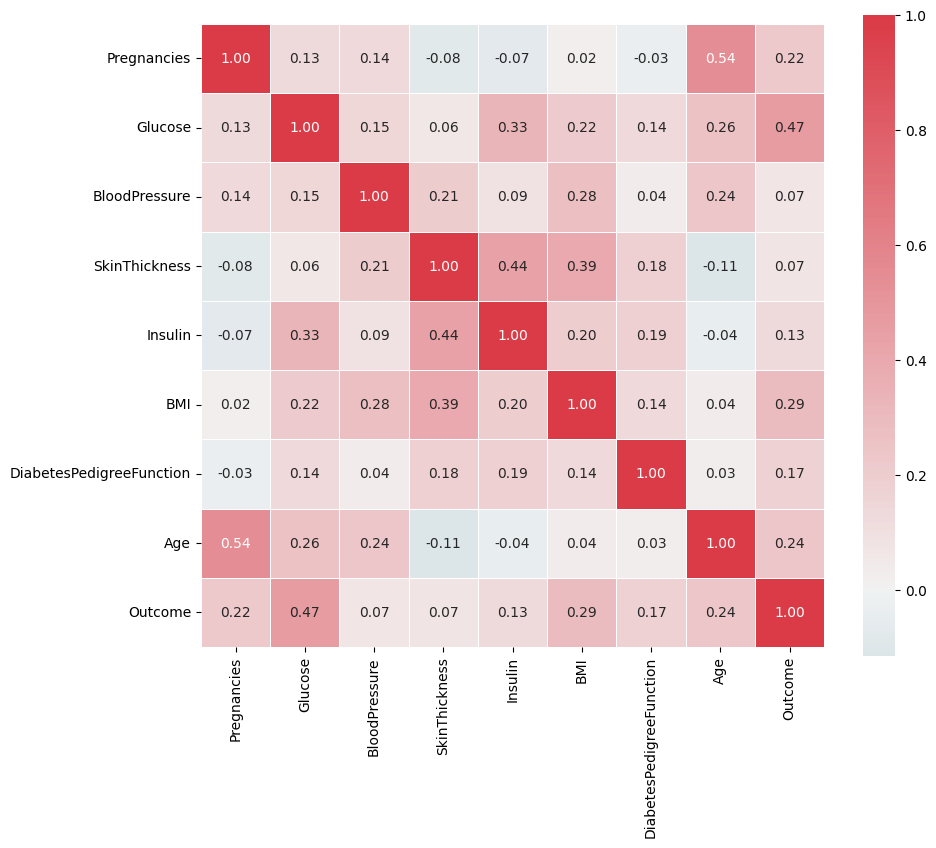

In [ ]:
def HeatMap(df,x=True):
        correlations = df.corr()
        ## Create color map ranging between two colors
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        fig, ax = plt.subplots(figsize=(10, 10))
        fig = sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',square=True, linewidths=.5, annot=x, cbar_kws={"shrink": .75})
        fig.set_xticklabels(fig.get_xticklabels(), rotation = 90, fontsize = 10)
        fig.set_yticklabels(fig.get_yticklabels(), rotation = 0, fontsize = 10)
        plt.tight_layout()
        plt.show()

HeatMap(df,x=True)

There is not highly corrolated feature in this data set.

## 4.3.2.Feature Importance
Bagged decision trees like Random Forest and Extra Trees can be used to estimate the importance of features.

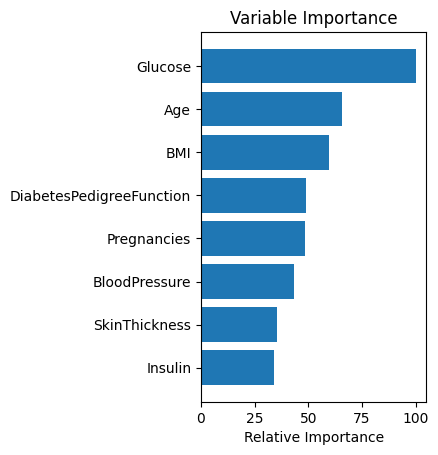

In [ ]:
clf = ExtraTreesClassifier(n_estimators=250,
                              random_state=SEED)

clf.fit(X_train_c, y_train_c)

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])#boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
df_feature_imp=df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]

In [ ]:
df_feature_imp_name = df_feature_imp.columns

In [ ]:
X =  df_feature_imp[df_feature_imp_name[0:df_feature_imp.shape[1]-1]]
Y = df_feature_imp[df_feature_imp_name[df_feature_imp.shape[1]-1]]
X_train_im, X_test_im, y_train_im, y_test_im =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_feature_imp['Outcome'])

In [ ]:
models = GetScaledModel('minmax')
names,results = BasedLine2(X_train_im, y_train_im,models)
PlotBoxR().PlotResult(names,results)

scaledScoreMinMax_im = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard,
                          scaledScoreMinMax,
                          scaledScoreMinMax_c,
                          scaledScoreMinMax_im], axis=1)
compareModels

minmaxLR: 0.791954 (0.060980)
minmaxLDA: 0.785027 (0.057899)
minmaxKNN: 0.758590 (0.049201)
minmaxCART: 0.718572 (0.052891)
minmaxNB: 0.781518 (0.056984)
minmaxSVM: 0.790109 (0.055234)
minmaxAB: 0.753297 (0.060581)
minmaxGBM: 0.774440 (0.052387)
minmaxRF: 0.753297 (0.059037)
minmaxET: 0.746400 (0.048974)


Model   Score         Model   Score       Model   Score       Model   Score  \
0    LR  0.7743    standardLR  0.7709    minmaxLR  0.7673    minmaxLR  0.7797   
1   LDA  0.7674   standardLDA  0.7674   minmaxLDA  0.7674   minmaxLDA  0.7755   
2   KNN  0.6979   standardKNN  0.7188   minmaxKNN  0.7155   minmaxKNN  0.7568   
3  CART  0.7012  standardCART  0.7064  minmaxCART  0.6943  minmaxCART  0.7104   
4    NB  0.7446    standardNB  0.7446    minmaxNB  0.7446    minmaxNB  0.7650   
5   SVM  0.7498   standardSVM  0.7552   minmaxSVM  0.7551   minmaxSVM  0.7756   
6    AB  0.7534    standardAB  0.7534    minmaxAB  0.7517    minmaxAB  0.7443   
7   GBM  0.7483   standardGBM  0.7534   minmaxGBM  0.7465   minmaxGBM  0.7525   
8    RF  0.7517    standardRF  0.7447    minmaxRF  0.7465    minmaxRF  0.7608   
9    ET  0.7378    standardET  0.7342    minmaxET  0.7430    minmaxET  0.7629   

        Model   Score  
0    minmaxLR  0.7920  
1   minmaxLDA  0.7850  
2   minmaxKNN  0.7586  
3  minmaxCART  0.7186  
4    minmaxNB  0.7815  
5   minmaxSVM  0.7901  
6    minmaxAB  0.7533  
7   minmaxGBM  0.7744  
8    minmaxRF  0.7533  
9    minmaxET  0.7464

We still could improve the prediction

# 5. Algortithm Tuning

In [ ]:
df_unscaled = df_clean[['Glucose','BMI','Age','DiabetesPedigreeFunction','Outcome']]
df_imp_scaled_name = df_unscaled.columns

In [ ]:
df_imp_scaled = MinMaxScaler().fit_transform(df_unscaled)
X =  df_imp_scaled[:,0:4]
Y =  df_imp_scaled[:,4]
X_train_sc, X_test_sc, y_train_sc, y_test_sc =train_test_split(X,Y,
                                                   test_size=0.1,
                                                   random_state=0,
                                                   stratify=df_imp_scaled[:,4])

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

<img src="https://image.ibb.co/cQh2sS/1_ZTl_Qm_WRcr_Nq_L_n_Lnx6_GJA.png" alt="1 ZTl Qm WRcr Nq L n Lnx6 GJA" border="0" />

In [ ]:
class RandomSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=100,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred



In [ ]:
class GridSearch(object):

    def __init__(self,X_train,y_train,model,hyperparameters):

        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters

    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_

    def BestModelPridict(self,X_test):

        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred



## 5.1.Logistic Regression
- C : Regularization value, the more, the stronger the regularization(double).
- RegularizationType: Can be either "L2" or “L1”. Default is “L2”.

In [ ]:
# model
model = LogisticRegression()
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=4)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [ ]:
LR_RandSearch = RandomSearch(X_train_sc,y_train_sc,model,hyperparameters)
# LR_best_model,LR_best_params = LR_RandSearch.RandomSearch()
Prediction_LR = LR_RandSearch.BestModelPridict(X_test_sc)

Best: 0.786903 using {'C': 3.730229437354635, 'penalty': 'l2'}


In [ ]:
def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" #first cast decimal as str
    #     print(prc) #str format output is {:.3f}
        return float(prc.format(f_val))

In [ ]:
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_LR).mean(),7))

prediction on test set is: 0.828125


## 5.2. KNN
- n_neighbors: Number of neighbors to use by default for k_neighbors queries

In [ ]:
model_KNN = KNeighborsClassifier()

neighbors = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
param_grid = dict(n_neighbors=neighbors)


In [ ]:
# X_train_sc = [2]  # Define and assign a value to X_train_sc
# y_train_sc = [3]
# X_test_sc=[4]
KNN_GridSearch = GridSearch(X_train_sc, y_train_sc, model_KNN, param_grid)
Prediction_KNN = KNN_GridSearch.BestModelPridict(X_test_sc)
print('Prediction on the test set is:', floatingDecimals((y_test_sc == Prediction_KNN).mean(), 7))


Best: 0.809558 using {'n_neighbors': 15}
Prediction on the test set is: 0.828125


## 5.3. SVC
- C: The Penalty parameter C of the error term.
- Kernel: Kernel type could be linear, poly, rbf or sigmoid.

In [ ]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = [ 'linear' , 'poly' , 'rbf' , 'sigmoid' ]
param_grid = dict(C=c_values, kernel=kernel_values)
model_SVC = SVC()

In [ ]:
SVC_GridSearch = GridSearch(X_train_sc,y_train_sc,model_SVC,param_grid)
Prediction_SVC = SVC_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_SVC).mean(),7))

Best: 0.792075 using {'C': 0.1, 'kernel': 'poly'}
prediction on test set is: 0.84375


## 5.4. Decision Tree
- max_depth:  Maximum depth of the tree (double).
- row_subsample: Proportion of observations to consider (double).
- max_features: Proportion of columns (features) to consider in each level (double).

In [ ]:
from scipy.stats import randint
max_depth_value = [3, None]
max_features_value =  randint(1, 4)
min_samples_leaf_value = randint(1, 4)
criterion_value = ["gini", "entropy"]

In [ ]:
param_grid = dict(max_depth = max_depth_value,
                  max_features = max_features_value,
                  min_samples_leaf = min_samples_leaf_value,
                  criterion = criterion_value)

In [ ]:
model_CART = DecisionTreeClassifier()
CART_RandSearch = RandomSearch(X_train_sc,y_train_sc,model_CART,param_grid)
Prediction_CART = CART_RandSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_CART).mean(),7))

Best: 0.765820 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2}
prediction on test set is: 0.78125


## 5.5 AdaBoostClassifier
- learning_rate: Learning rate shrinks the contribution of each classifier by learning_rate.
- n_estimators: Number of trees to build.

In [ ]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [ ]:
model_Ad = AdaBoostClassifier()
Ad_GridSearch = GridSearch(X_train_sc,y_train_sc,model_Ad,param_grid)
Prediction_Ad = Ad_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_Ad).mean(),7))


Best: 0.800817 using {'learning_rate': 0.05, 'n_estimators': 150}
prediction on test set is: 0.8125


## 5.6 GradientBoosting

In [ ]:
learning_rate_value = [.01,.05,.1,.5,1]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(learning_rate=learning_rate_value, n_estimators=n_estimators_value)

In [ ]:
model_GB = GradientBoostingClassifier()
GB_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_GB = GB_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_GB).mean(),7))

Best: 0.774622 using {'learning_rate': 0.01, 'n_estimators': 200}
prediction on test set is: 0.828125


Random Forest


In [ ]:
random_state = [1,0,42,100, 123]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(random_state = random_state, n_estimators=n_estimators_value)

In [ ]:
model_RF = RandomForestClassifier()
RF_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_RF = RF_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_RF).mean(),7))

Best: 0.767695 using {'n_estimators': 50, 'random_state': 1}
prediction on test set is: 0.765625


ExtraTree Classifier

In [ ]:
random_state = [1,0,42,100, 123]
n_estimators_value = [50,100,150,200,250,300]

param_grid = dict(random_state = random_state, n_estimators=n_estimators_value)

In [ ]:
model_ET = RandomForestClassifier()
ET_GridSearch = GridSearch(X_train_sc,y_train_sc,model_GB,param_grid)
Prediction_ET = ET_GridSearch.BestModelPridict(X_test_sc)
print('prediction on test set is:' ,floatingDecimals((y_test_sc == Prediction_ET).mean(),7))

Best: 0.767695 using {'n_estimators': 50, 'random_state': 1}
prediction on test set is: 0.765625


 # 6. Ensemble Methods

## 6.1 Voting Ensemble

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms. It works by first creating two or more standalone models from your training dataset.
A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
param = {'C': 0.7678243129497218, 'penalty': 'l2'}
model1 = LogisticRegression(**param)

param = {'n_neighbors': 15}
model2 = KNeighborsClassifier(**param)

param = {'C': 1.7, 'kernel': 'linear'}
model3 = SVC(**param)

param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
model4 = DecisionTreeClassifier(**param)

param = {'learning_rate': 0.05, 'n_estimators': 150}
model5 = AdaBoostClassifier(**param)

param = {'learning_rate': 0.01, 'n_estimators': 100}
model6 = GradientBoostingClassifier(**param)

model7 = GaussianNB()

# param = {'n_estimators': 50, 'random_state': 1}
model8 = RandomForestClassifier()

# param = {'n_estimators': 50, 'random_state': 1}
model9 = ExtraTreesClassifier()

In [ ]:
# create the sub models
estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
              ('DT',model4), ('ADa',model5), ('GB',model6),
              ('NB',model7), ('RF',model8),  ('ET',model9)]


In [ ]:
# create the ensemble model
kfold = StratifiedKFold(n_splits=5, random_state=SEED, shuffle=True)
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X_train_sc,y_train_sc, cv=10)
print('Accuracy on train: ',results.mean())
ensemble_model = ensemble.fit(X_train_sc,y_train_sc)
pred = ensemble_model.predict(X_test_sc)
print('Accuracy on test:' , (y_test_sc == pred).mean())

Accuracy on train:  0.7991530550514218
Accuracy on test: 0.828125


## Beyond Voting

In [ ]:
def get_models():
    """Generate a library of base learners."""
    param = {'C': 0.7678243129497218, 'penalty': 'l2'}
    model1 = LogisticRegression(**param)

    param = {'n_neighbors': 15}
    model2 = KNeighborsClassifier(**param)

    param = {'C': 1.7, 'kernel': 'linear', 'probability':True}
    model3 = SVC(**param)

    param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
    model4 = DecisionTreeClassifier(**param)

    param = {'learning_rate': 0.05, 'n_estimators': 150}
    model5 = AdaBoostClassifier(**param)

    param = {'learning_rate': 0.01, 'n_estimators': 100}
    model6 = GradientBoostingClassifier(**param)

    model7 = GaussianNB()

    # param = {'n_estimators': 50, 'random_state': 1}
    model8 = RandomForestClassifier()

    # param = {'n_estimators': 50, 'random_state': 1}
    model9 = ExtraTreesClassifier()

    models = {'LR':model1, 'KNN':model2, 'SVC':model3,
              'DT':model4, 'ADa':model5, 'GB':model6,
              'NB':model7, 'RF':model8,  'ET':model9
              }

    return models

## 6.2. Error Corrolation

In [ ]:
def train_predict(model_list,xtrain, xtest, ytrain, ytest):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(model_list)))
    P = pd.DataFrame(P)

    print("Fitting models.")
    cols = list()
    for i, (name, m) in enumerate(models.items()):
        print("%s..." % name, end=" ", flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:, i] = m.predict_proba(xtest)[:, 1]
        cols.append(name)
        print("done")

    P.columns = cols
    print("Done.\n")
    return P

In [ ]:
models = get_models()
P = train_predict(models, X_train_sc, X_test_sc, y_train_sc, y_test_sc)

Fitting models.
LR... done
KNN... done
SVC... done
DT... done
ADa... done
GB... done
NB... done
RF... done
ET... done
Done.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 5.7 MB/s eta 0:00:00


[MLENS] backend: threading


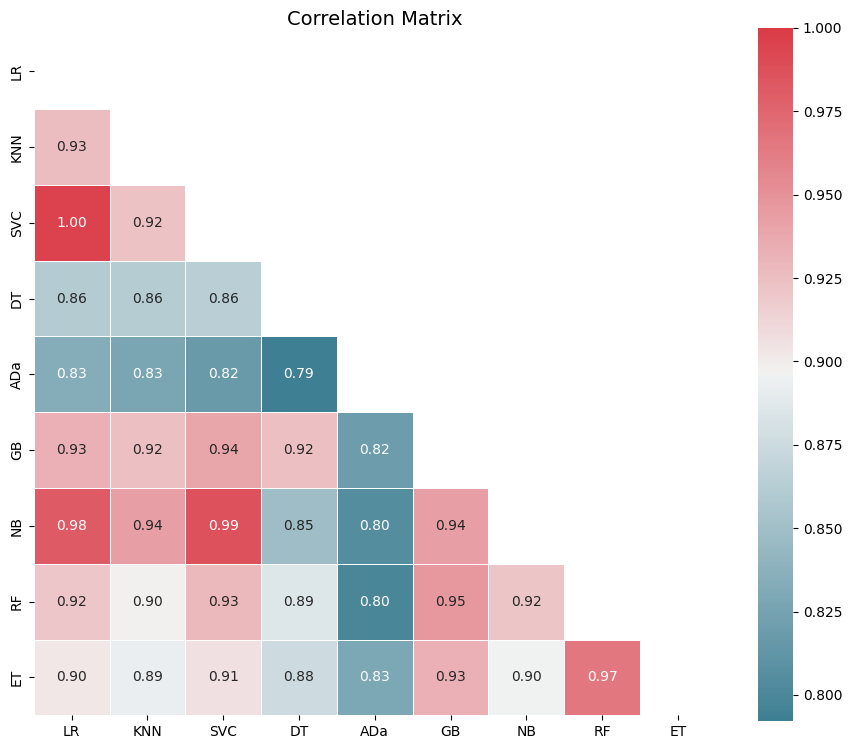

<Axes: title={'center': 'Correlation Matrix'}>

In [ ]:
!pip3 install mlens
from mlens.visualization import corrmat

corrmat(P.corr(), inflate=False)


Errors are significantly correlated, which is to be expected for models that perform well, since it's typically the outliers that are hard to get right. In fact, if we look at error correlations on a class prediction basis things look a bit more promising:

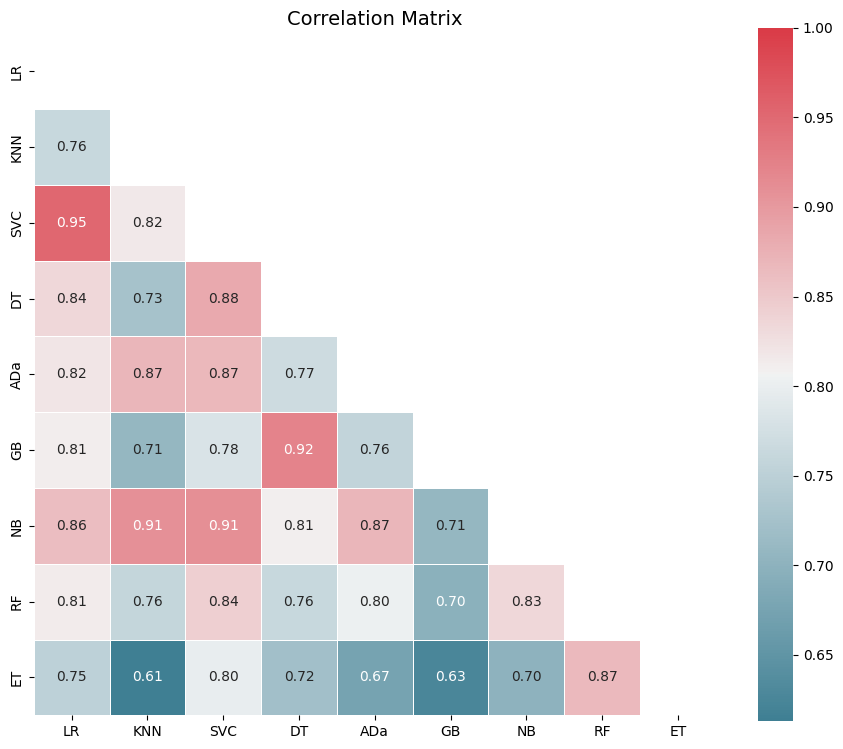

<Axes: title={'center': 'Correlation Matrix'}>

In [ ]:
corrmat(P.apply(lambda predic: 1*(predic >= 0.5) - y_test_sc).corr(), inflate=False)

# 6.3 Stacking

In [ ]:
base_learners = get_models()
meta_learner = GradientBoostingClassifier(
    n_estimators=1000,
    loss="exponential",
    max_features=6,
    max_depth=3,
    subsample=0.5,
    learning_rate=0.001,
    random_state=SEED
)

In [ ]:
list(base_learners.values())

[LogisticRegression(C=0.7678243129497218),
 KNeighborsClassifier(n_neighbors=15),
 SVC(C=1.7, kernel='linear', probability=True),
 DecisionTreeClassifier(max_depth=3, max_features=2, min_samples_leaf=3),
 AdaBoostClassifier(learning_rate=0.05, n_estimators=150),
 GradientBoostingClassifier(learning_rate=0.01),
 GaussianNB(),
 RandomForestClassifier(),
 ExtraTreesClassifier()]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
base_learners = [
    ('lr', LogisticRegression(C=0.7678243129497218)),
    ('knn', KNeighborsClassifier(n_neighbors=15)),
    ('svc', SVC(C=1.7, kernel='linear', probability=True)),
    ('dt', DecisionTreeClassifier(max_depth=3, max_features=2, min_samples_leaf=3)),
    ('ada', AdaBoostClassifier(learning_rate=0.05, n_estimators=150)),
    ('gb', GradientBoostingClassifier(learning_rate=0.01)),
    ('gnb', GaussianNB()),
    ('rf', RandomForestClassifier()),
    ('et', ExtraTreesClassifier()),
]
# Initialize Stacking Classifier with the Meta Learner
stack = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    stack_method='auto',
    cv=skf,
    n_jobs=-1  # using all processors
)

# Fit the stack ensemble
stack.fit(X_train_sc, y_train_sc)

# Predict the probabilities on the test set
p_stack = stack.predict_proba(X_test_sc)


In [ ]:
# from mlens.ensemble import SuperLearner

# # Instantiate the ensemble with 10 folds
# sl = SuperLearner(
#     folds=10,
#     random_state=SEED,
#     verbose=2,
#     backend="multiprocessing"
# )

# # Add the base learners and the meta learner
# sl.add(list(base_learners.values()), proba=True)
# sl.add_meta(meta_learner, proba=True)

# # Train the ensemble
# sl.fit(X_train_sc, y_train_sc)

# # Predict the test set
# p_sl = sl.predict_proba(X_test_sc)

# # print("\nSuper Learner ROC-AUC score: %.3f" % roc_auc_score(y_test_sc, p_sl[:, 1]))

# from sklearn.ensemble import StackingClassifier
# from sklearn.metrics import roc_auc_score

# # Base learners
# base_learners = [('model1', model1),
#                  ('model2', model2),
#                  ('model3', model3)] # Replace with your models

# # Meta learner
# meta_learner = meta_model # Replace with your meta model
# stack = StackingClassifier(estimators=base_learners,
#                            final_estimator=meta_learner,
#                            cv=10,
#                            passthrough=True)

# # Fit the ensemble to the training set
# stack.fit(X_train_sc, y_train_sc)

# # Predict the probabilities for the test set
# p_stack = stack.predict_proba(X_test_sc)
# # Calculate and print ROC-AUC score
# roc_auc = roc_auc_score(y_test_sc, p_stack[:, 1])
# print(f"\nStacking Classifier ROC-AUC score: {roc_auc:.3f}")

In [ ]:
# pp = []
# for p in p_sl[:, 1]:
#     if p>0.5:
#         pp.append(1.)
#     else:
#         pp.append(0.)

In [ ]:
# pp=[]
# print("\nSuper Learner Accuracy score: %.8f" % (y_test_sc== pp).mean())

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# Predict the probabilities on the test set
p_stack = stack.predict_proba(X_test_sc)

# Convert probabilities to class predictions
pp_stack = [1. if p[1] > 0.5 else 0. for p in p_stack]

# Calculate accuracy
accuracy = (y_test_sc == pp_stack).mean()
print("\nStacking Classifier Accuracy score: %.8f" % accuracy)
print(f'accuracy score: {accuracy_score(y, y_pred)}')


Stacking Classifier Accuracy score: 0.84375000


NameError: ignored

## ANN

In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers, optimizers, losses, callbacks
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Dropout, Flatten, Input, Activation, PReLU, LeakyReLU, ThresholdedReLU
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, classification_report, f1_score
import keras.backend as K

In [ ]:
model = models.Sequential(name="pimamodel")
model.add(Input(shape=[X.shape[1]], name="Features"))
model.add(Dense(128))
model.add(PReLU())
model.add(Dense(64))
model.add(PReLU())
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer=optimizers.Adam(), metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint('best_model_nn.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
history_model = model.fit(
  X_train_sc, y_train_sc,
  batch_size=32,
  epochs=50, validation_split=0.3, verbose=1, callbacks=[mc]
)

In [ ]:
def score_custom_network(y_train, y_test):
    print("=====> Scoring Custom Network <=====")

    preds = model.predict(X_test_sc)
    preds = preds.flatten()
    y_pred = np.where(preds > 0.5, 1, 0)

    print (classification_report(y_test_sc, y_pred, digits=4))
    print ("Accuracy:", accuracy_score(y_test_sc, y_pred))
    print ("Precision", precision_score(y_test_sc, y_pred))
    print ("Recall:", recall_score(y_test_sc, y_pred))
    print ("F1 Score:", f1_score(y_test_sc, y_pred))

score_custom_network(y_train_sc, y_test_sc)

## FID3

In [ ]:
!pip install fuzzytree
from fuzzytree import FuzzyDecisionTreeClassifier

from sklearn.pipeline import make_pipeline

In [ ]:
dt_fuzz = FuzzyDecisionTreeClassifier().fit(X_train_sc, y_train_sc)
dt_sk = DecisionTreeClassifier().fit(X_train_sc, y_train_sc)

# fuzz_pred = dt_fuzz.predict(X_test_sc)
# sk_pred = dt_sk.predict(X_test_sc)

def score_custom_network_fuzz(y_train, y_test):
    print("=====> Scoring Custom Network for Fuzzy Decision Tree <=====")

    fuzz_preds = model.predict(X_test_sc)
    fuzz_preds = fuzz_preds.flatten()
    fuzz_pred_f = np.where(fuzz_preds > 0.5, 1, 0)

    print (classification_report(y_test_sc, fuzz_pred_f, digits=4))
    print ("Accuracy:", accuracy_score(y_test_sc, fuzz_pred_f))
    print ("Precision", precision_score(y_test_sc, fuzz_pred_f))
    print ("Recall:", recall_score(y_test_sc, fuzz_pred_f))
    print ("F1 Score:", f1_score(y_test_sc, fuzz_pred_f))

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test_sc, fuzz_pred_f)
    print("Confusion Matrix:")
    print(cm)

    # Calculate and print ROC AUC score
    # roc_auc = roc_auc_score(y_test_sc, fuzz_pred_f)
    # print("ROC AUC Score:", roc_auc)

    # Calculate and print average precision score
    # avg_precision = average_precision_score(y_test_sc, fuzz_pred_f)
    # print("Average Precision Score:", avg_precision)

    # # Calculate and print Matthews correlation coefficient
    # matthews_corr = matthews_corrcoef(y_test_sc, fuzz_pred_f)
    # print("Matthews Correlation Coefficient:", matthews_corr)

    # # Calculate and print Cohen's kappa score
    # cohen_kappa = cohen_kappa_score(y_test_sc, fuzz_pred_f)
    # print("Cohen's Kappa Score:", cohen_kappa)

    # # Calculate and print root mean squared error (RMSE)
    # rmse = mean_squared_error(y_test_sc, fuzz_pred_f, squared=False)
    # print("Root Mean Squared Error (RMSE):", rmse)

score_custom_network_fuzz(y_train_sc, y_test_sc)

def score_custom_network_sk(y_train, y_test):
    print("=====> Scoring Custom Network for Decision Tree <=====")

    sk_preds = model.predict(X_test_sc)
    sk_preds = sk_preds.flatten()
    sk_pred_f = np.where(sk_preds > 0.5, 1, 0)

    print (classification_report(y_test_sc, sk_pred_f, digits=4))
    print ("Accuracy:", accuracy_score(y_test_sc, sk_pred_f))
    print ("Precision", precision_score(y_test_sc, sk_pred_f))
    print ("Recall:", recall_score(y_test_sc, sk_pred_f))
    print ("F1 Score:", f1_score(y_test_sc, sk_pred_f))

    # Calculate and print confusion matrix
    cm = confusion_matrix(y_test_sc, sk_pred_f)
    print("Confusion Matrix:")
    print(cm)

    # # Calculate and print ROC AUC score
    # roc_auc = roc_auc_score(y_test_sc, sk_pred_f)
    # print("ROC AUC Score:", roc_auc)

    # # Calculate and print average precision score
    # avg_precision = average_precision_score(y_test_sc, sk_pred_f)
    # print("Average Precision Score:", avg_precision)

    # # Calculate and print Matthews correlation coefficient
    # matthews_corr = matthews_corrcoef(y_test_sc, sk_pred_f)
    # print("Matthews Correlation Coefficient:", matthews_corr)

    # # Calculate and print Cohen's kappa score
    # cohen_kappa = cohen_kappa_score(y_test_sc, sk_pred_f)
    # print("Cohen's Kappa Score:", cohen_kappa)

    # # Calculate and print root mean squared error (RMSE)
    # rmse = mean_squared_error(y_test_sc, sk_pred_f, squared=False)
    # print("Root Mean Squared Error (RMSE):", rmse)



score_custom_network_sk(y_train_sc, y_test_sc)

In [ ]:
pipe = make_pipeline(MinMaxScaler(), FuzzyDecisionTreeClassifier())
pipe.fit(X_train_sc,y_train_sc)
fuzz_pipe_pred = pipe.predict(X_test_sc)
fuzz_pipe_pred = fuzz_pipe_pred.flatten()
fuzz_pipe_f = np.where(fuzz_pipe_pred > 0.5, 1, 0)

print (classification_report(y_test_sc, fuzz_pipe_f, digits=4))
print ("Accuracy:", accuracy_score(y_test_sc, fuzz_pipe_f))
print ("Precision", precision_score(y_test_sc, fuzz_pipe_f))
print ("Recall:", recall_score(y_test_sc, fuzz_pipe_f))
print ("F1 Score:", f1_score(y_test_sc, fuzz_pipe_f))

In [ ]:
from sklearn.metrics import confusion_matrix, roc_auc_score, average_precision_score, matthews_corrcoef, cohen_kappa_score

# Calculate and print confusion matrix
cm = confusion_matrix(y_test_sc, fuzz_pipe_f)
print("Confusion Matrix:")
print(cm)

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test_sc, fuzz_pipe_f)
print("ROC AUC Score:", roc_auc)

# Calculate and print average precision score
avg_precision = average_precision_score(y_test_sc, fuzz_pipe_f)
print("Average Precision Score:", avg_precision)

# Calculate and print Matthews correlation coefficient
matthews_corr = matthews_corrcoef(y_test_sc, fuzz_pipe_f)
print("Matthews Correlation Coefficient:", matthews_corr)

# Calculate and print Cohen's kappa score
cohen_kappa = cohen_kappa_score(y_test_sc, fuzz_pipe_f)
print("Cohen's Kappa Score:", cohen_kappa)


##ANN + LTSM

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score


In [ ]:
# Reshape the input data
X_train_reshaped = np.reshape(X_train_sc, (X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_reshaped = np.reshape(X_test_sc, (X_test_sc.shape[0], 1, X_test_sc.shape[1]))

# Create and compile the model
model = Sequential()
model.add(LSTM(units=128, input_shape=(1, X_train_sc.shape[1])))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_reshaped, y_train_sc, epochs=50, batch_size=32, validation_data=(X_test_reshaped, y_test_sc))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_reshaped, y_test_sc)

In [ ]:
y_pred = model.predict(X_test_reshaped)
y_pred = np.round(y_pred).flatten()
# Print the evaluation metrics
print("Classification Report", classification_report(y_test_sc, y_pred))
print ("Accuracy:", accuracy_score(y_test_sc, y_pred))
print ("Precision", precision_score(y_test_sc, y_pred))
print ("Recall:", recall_score(y_test_sc, y_pred))
print ("F1 Score:", f1_score(y_test_sc, y_pred))
# Calculate and print confusion matrix
cm = confusion_matrix(y_test_sc, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate and print ROC AUC score
roc_auc = roc_auc_score(y_test_sc, y_pred)
print("ROC AUC Score:", roc_auc)

# Calculate and print average precision score
avg_precision = average_precision_score(y_test_sc, y_pred)
print("Average Precision Score:", avg_precision)

# Calculate and print Matthews correlation coefficient
matthews_corr = matthews_corrcoef(y_test_sc, y_pred)
print("Matthews Correlation Coefficient:", matthews_corr)

# Calculate and print Cohen's kappa score
cohen_kappa = cohen_kappa_score(y_test_sc, y_pred)
print("Cohen's Kappa Score:", cohen_kappa)

# Calculate and print root mean squared error (RMSE)
# rmse = mean_squared_error(y_test_sc, y_pred, squared=False)
# print("Root Mean Squared Error (RMSE):", rmse)

##RNN-lstm

using rmsprop optimizer

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

# Scale the test data
sc = MinMaxScaler(feature_range=(0, 1))
X_test_reshaped = sc.fit_transform(X_test_sc)

# Reshape the input data
X_train_reshaped = np.reshape(X_train_sc, (X_train_sc.shape[0], X_train_sc.shape[1], 1))
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1], 1))

# The LSTM architecture
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_sc.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')

# Fitting to the training set
regressor.fit(X_train_reshaped, y_train_sc, epochs=50, batch_size=32)

In [ ]:
# Function to calculate and print RMSE
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Predict and inverse transform the output
y_pred = regressor.predict(X_test_reshaped)
y_pred_f = np.where(y_pred > 0.5, 1, 0)

# Calculate and print RMSE
return_rmse(y_test_sc, y_pred_f)

In [ ]:
accuracy = (y_test_sc == y_pred_f).mean()
print("Accuracy: {:.2%}".format(accuracy))

using ADAM optimizer

In [ ]:
# Scale the test data
sc = MinMaxScaler(feature_range=(0, 1))
X_test_reshaped = sc.fit_transform(X_test_sc)

# Reshape the input data
X_train_reshaped = np.reshape(X_train_sc, (X_train_sc.shape[0], X_train_sc.shape[1], 1))
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1], 1))

# The LSTM architecture
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_sc.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')  # Using Adam optimizer

# Fitting to the training set
regressor.fit(X_train_reshaped, y_train_sc, epochs=100, batch_size=32)  # Increasing epochs

# Function to calculate and print RMSE
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Predict and inverse transform the output
y_pred = regressor.predict(X_test_reshaped)
y_pred_f = np.where(y_pred > 0.5, 1, 0)

# Calculate and print RMSE
return_rmse(y_test_sc, y_pred_f)

# Calculate accuracy
accuracy = (y_test_sc == y_pred_f).mean()
print("Accuracy: {:.2%}".format(accuracy))


Regular RNN + one LSTM

In [ ]:
# Scale the test data
sc = MinMaxScaler(feature_range=(0, 1))
X_test_reshaped = sc.fit_transform(X_test_sc)

# Reshape the input data
X_train_reshaped = np.reshape(X_train_sc, (X_train_sc.shape[0], X_train_sc.shape[1], 1))
X_test_reshaped = np.reshape(X_test_reshaped, (X_test_reshaped.shape[0], X_test_reshaped.shape[1], 1))

# The RNN architecture
regressor = Sequential()
regressor.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train_sc.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting to the training set
regressor.fit(X_train_reshaped, y_train_sc, epochs=100, batch_size=32)

# Function to calculate and print RMSE
def return_rmse(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

# Predict and inverse transform the output
y_pred = regressor.predict(X_test_reshaped)
y_pred_f = np.where(y_pred > 0.5, 1, 0)

# Calculate and print RMSE
return_rmse(y_test_sc, y_pred_f)

# Calculate accuracy
accuracy = (y_test_sc == y_pred_f).mean()
print("Accuracy: {:.2%}".format(accuracy))
